In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
data_path = 'Fish_Dataset/Fish_Dataset'

# Создание генераторов изображений с аугментацией данных
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
450/450 [==============================] - 200s 444ms/step - loss: 0.8225 - accuracy: 0.6799 - val_loss: 0.4321 - val_accuracy: 0.8354
Epoch 2/10
450/450 [==============================] - 210s 466ms/step - loss: 0.8046 - accuracy: 0.6881 - val_loss: 0.6849 - val_accuracy: 0.7729
Epoch 3/10
450/450 [==============================] - 212s 470ms/step - loss: 0.7965 - accuracy: 0.6888 - val_loss: 0.6380 - val_accuracy: 0.7659
Epoch 4/10
450/450 [==============================] - 208s 461ms/step - loss: 0.7750 - accuracy: 0.6983 - val_loss: 1.5777 - val_accuracy: 0.6858
Epoch 5/10
450/450 [==============================] - 207s 460ms/step - loss: 0.7638 - accuracy: 0.6971 - val_loss: 0.6169 - val_accuracy: 0.8016
Epoch 6/10
450/450 [==============================] - 207s 461ms/step - loss: 0.7303 - accuracy: 0.7157 - val_loss: 0.7361 - val_accuracy: 0.8036
Epoch 7/10
450/450 [==============================] - 207s 459ms/step - loss: 0.7184 - accuracy: 0.7188 - val_loss: 0.8643 -

In [25]:
# Оценка модели
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

113/113 [==============================] - 33s 291ms/step - loss: 0.5438 - accuracy: 0.8369
Validation Accuracy: 0.84


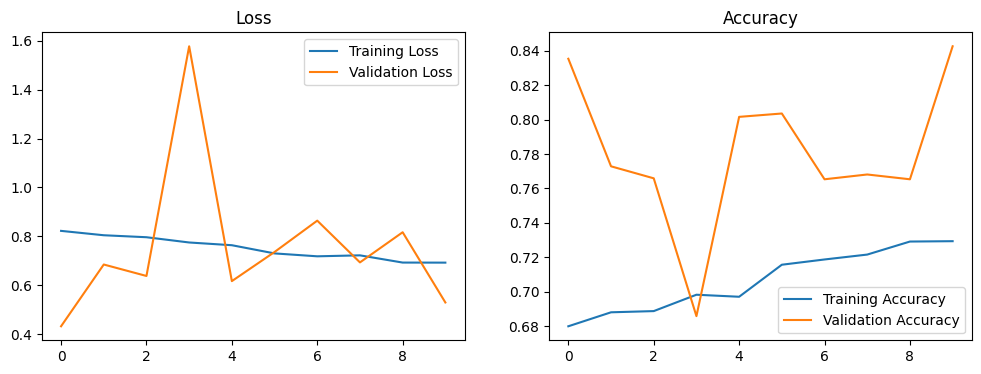

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

В этом случае Validation Accuracy получил хороший результат. Но по графику видны резкие перепады по потерям и точности, что не является хорошим результатом